## import library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"D:\DS Training\PGPDS_AI\Pandas\dataset\Customer Churn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Inspections of the Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# replace blank with 0 as tenure is 0 and no total charges are recorded.

In [6]:
df['TotalCharges'] = df['TotalCharges'].replace(" ", 0)   ## replace blank value with 0
df['TotalCharges'] = df['TotalCharges'].astype("float")   ## convert totalcharges dtype object to float

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df.isnull().sum().sum() # show the null value in data

np.int64(0)

In [9]:
df.describe()
#show the stastical information of numerical data.

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [11]:
df['customerID'].duplicated().sum() # check the duplicate on entire rows of customerid

np.int64(0)

In [12]:
df.duplicated().sum()

np.int64(0)

In [14]:
def conv(value):
    if value == 1:
        return "Yes"
    else:
        return "no"

df['SeniorCitizen'] = df['SeniorCitizen'].apply(conv)

In [ ]:
#converted 0 and 1 values of Senior Citizen to yes/no to make it easier to understand

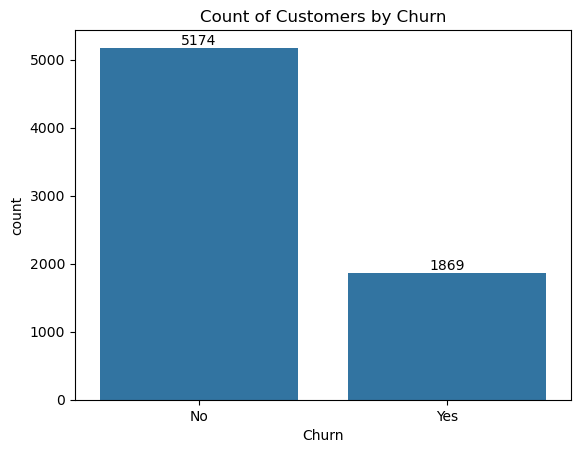

In [31]:
ax = sns.countplot(x= 'Churn', data = df)
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Churn")
plt.show()

In [27]:
gb = df.groupby("Churn").agg({'Churn': 'count'})
gb

,Churn
Churn,
No,5174
Yes,1869


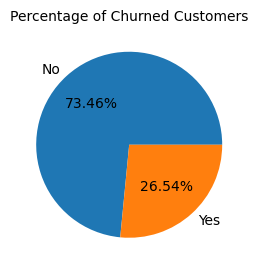

In [36]:
plt.figure(figsize = (3,4))
plt.pie(gb['Churn'], labels = gb.index, autopct = "%1.2f%%")
plt.title("Percentage of Churned Customers", fontsize = 10)
plt.show()

#from the given pie chart we can conclude that 26.54% of our customers have churned out. /n now lets explore the resion behind it

<function matplotlib.pyplot.show(close=None, block=None)>

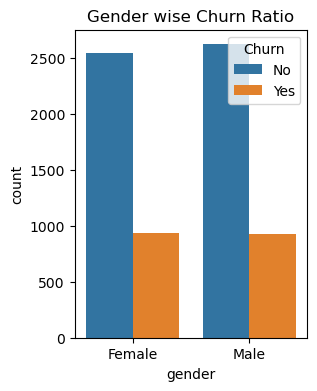

In [41]:
plt.figure(figsize = (3,4))
sns.countplot(x="gender", data = df, hue = "Churn")
plt.title("Gender wise Churn Ratio")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

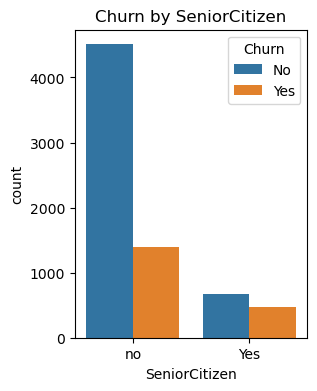

In [42]:
plt.figure(figsize = (3,4))
sns.countplot(x="SeniorCitizen", data = df, hue = "Churn")
plt.title("Churn by SeniorCitizen")
plt.show

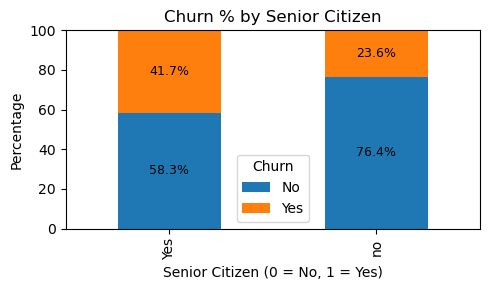

In [46]:
# Step 1: Create normalized crosstab (percentages)
cross = pd.crosstab(df['SeniorCitizen'], df['Churn'], normalize='index') * 100
cross = cross.round(1)

# Step 2: Plot the stacked bar chart
ax = cross.plot(kind='bar', stacked=True, figsize=(5, 3))

# Step 3: Add percentage labels
for idx, row in enumerate(cross.values):
    cumulative = 0
    for val in row:
        if val > 0:
            plt.text(
                idx,                # x-position (bar index)
                cumulative + val/2, # y-position (center of each bar section)
                f'{val}%',          # label text
                ha='center', va='center', fontsize=9
            )
            cumulative += val

# Step 4: Clean up the chart
plt.title("Churn % by Senior Citizen")
plt.ylabel("Percentage")
plt.xlabel("Senior Citizen (0 = No, 1 = Yes)")
plt.legend(title='Churn')
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

In [ ]:
# comparatively a grater percentage of people in senior citizen category have churned.

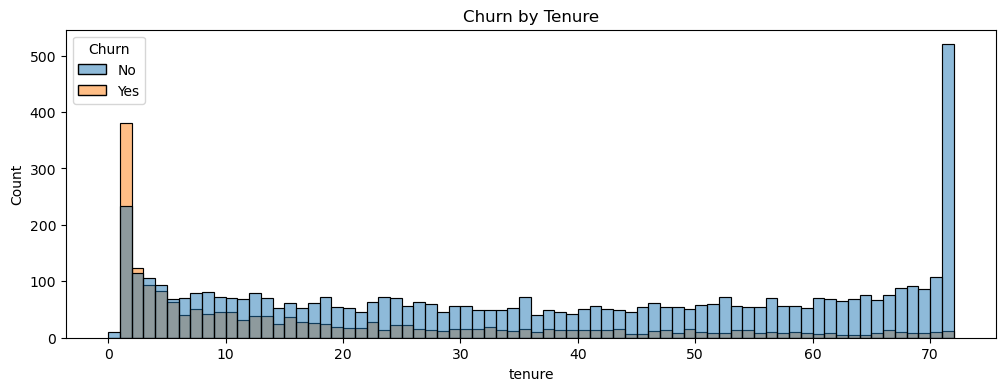

In [51]:
plt.figure(figsize=(12,4))
sns.histplot(x="tenure", data = df, bins=72, hue="Churn")
plt.title("Churn by Tenure")
plt.show()

In [ ]:
#people who have used our services as a long time have stayed and people who have used our service #1 or 2 months have churned

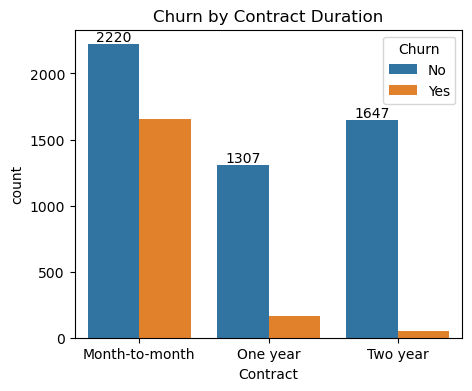

In [56]:
plt.figure(figsize=(5,4))
ax = sns.countplot(x='Contract', data=df, hue="Churn")
ax.bar_label(ax.containers[0])
plt.title("Churn by Contract Duration")
plt.show()

In [57]:
#people who have month to month contract are likely to churn then from those who have 1 or 2 years of contract

In [58]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

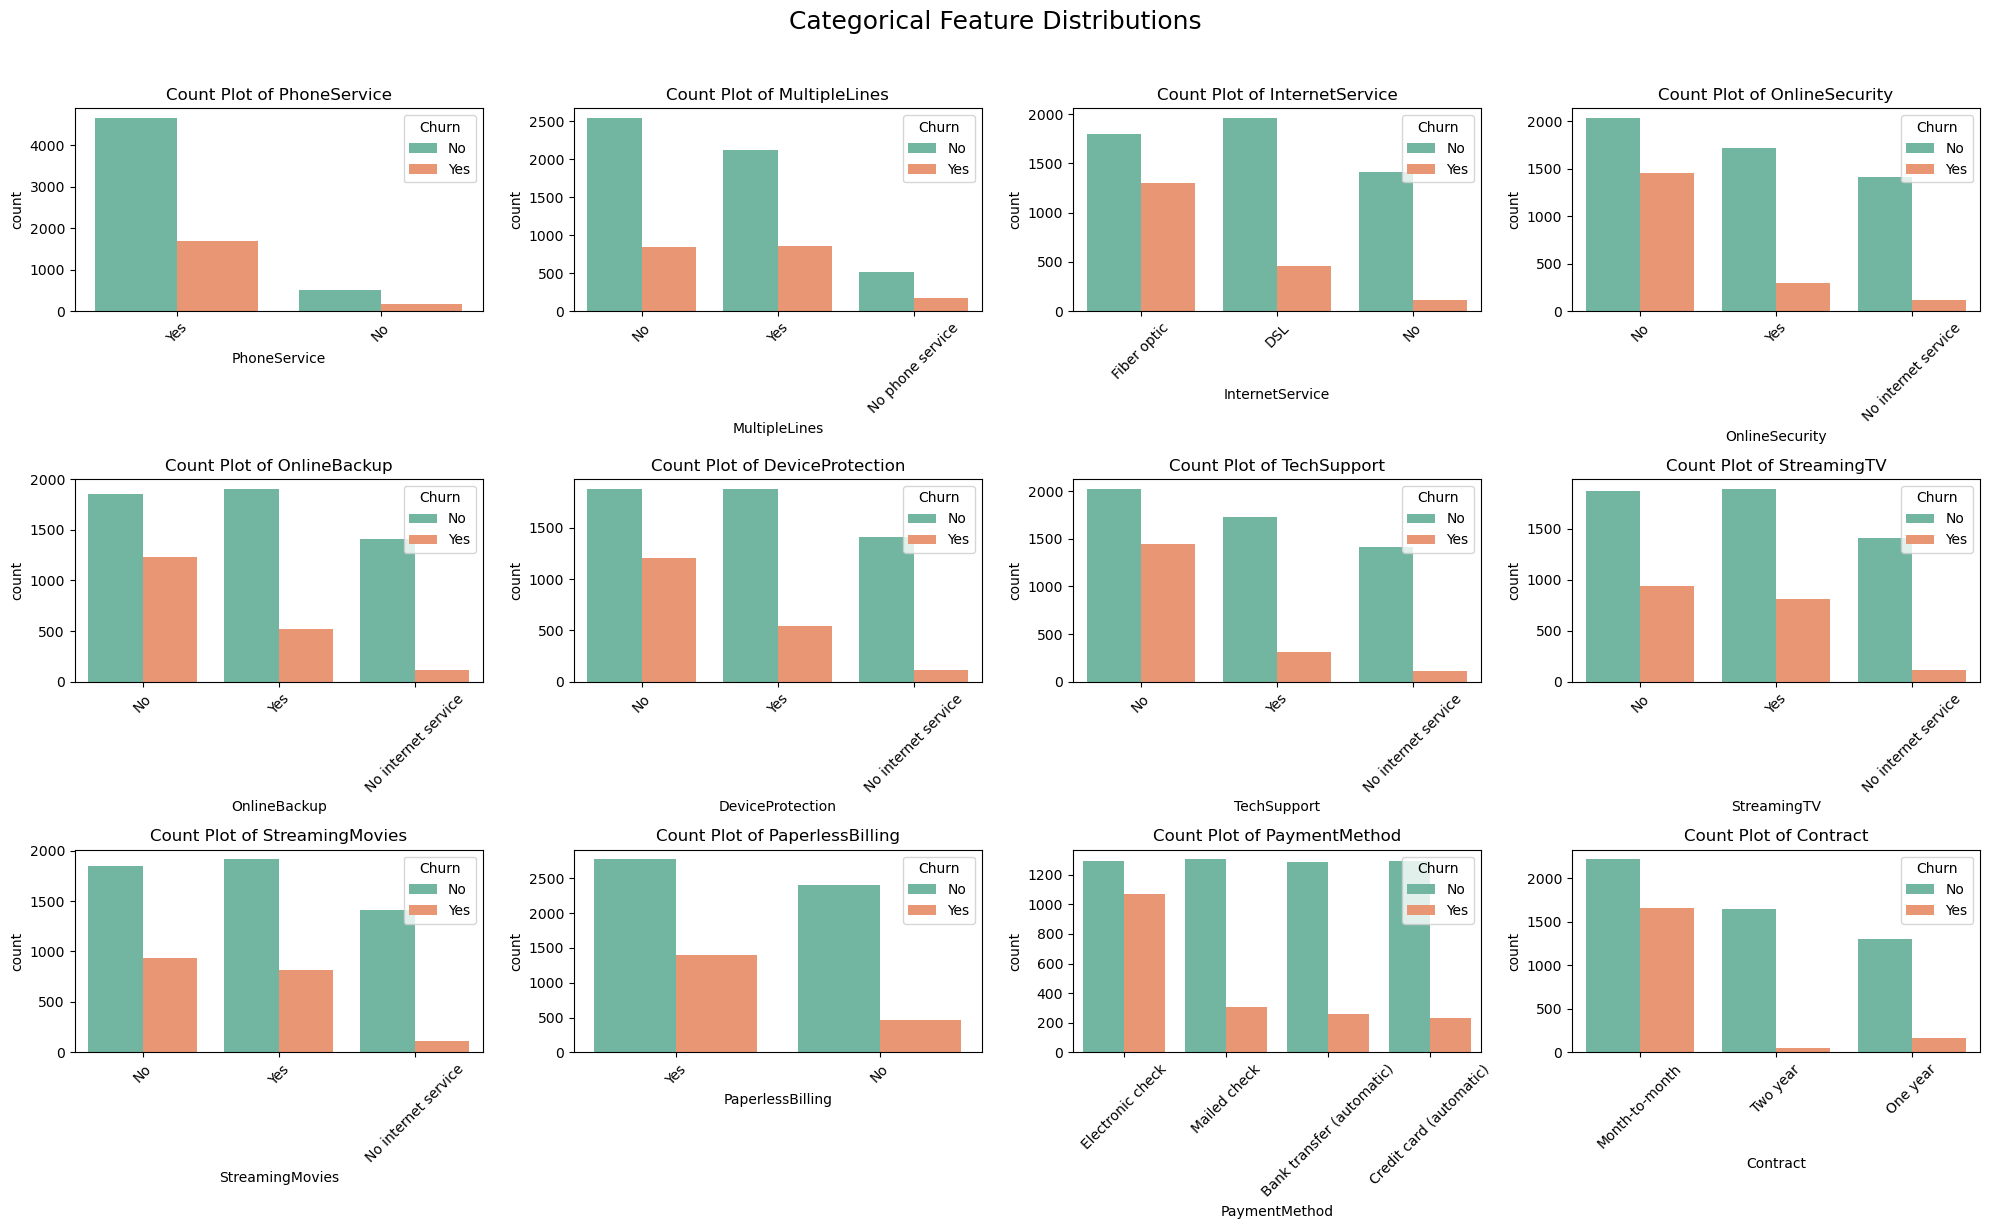

In [67]:
# Define columns for count plots (exclude customerID and numeric ones for now)
cat_columns = [
    'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
    'PaperlessBilling', 'PaymentMethod', 'Contract']

# Set grid size (adjust rows/cols based on number of plots)
n_cols = 4
n_rows = -(-len(cat_columns) // n_cols)  # Ceiling division

# Set up subplots
plt.figure(figsize=(20, n_rows * 4))

for idx, col in enumerate(cat_columns, 1):
    plt.subplot(n_rows, n_cols, idx)
    sns.countplot(data=df, x=col, palette="Set2", order=df[col].value_counts().index, hue = "Churn")
    plt.title(f'Count Plot of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.suptitle("Categorical Feature Distributions", fontsize=18, y=1.02)
plt.tight_layout()
plt.show()

### churn is noticeably higher among customers with no partners, those using month-to-month contracts, and those lacking services like OnlineSecurity or TechSupport. Senior citizens and paperless billing users also show higher churn.

## Created a Stacked Bar Plot for PaymentMethod colored by Churn

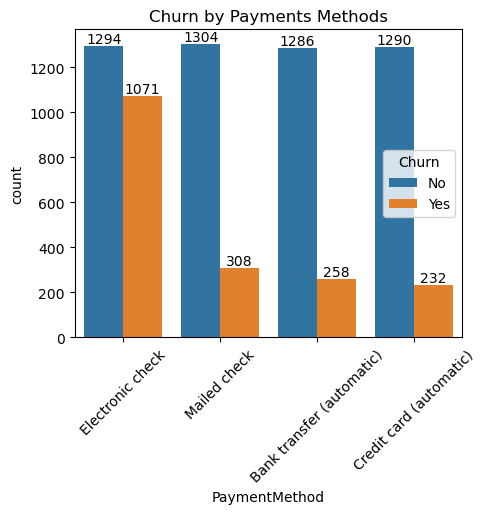

In [98]:
plt.figure(figsize=(5,4))
ax = sns.countplot(x='PaymentMethod', data = df, hue= "Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churn by Payments Methods")
plt.xticks(rotation=45)
plt.show()

### likely to churn when customers are using payment methods through checks

## Created a correlation heatmap (numerical features only)

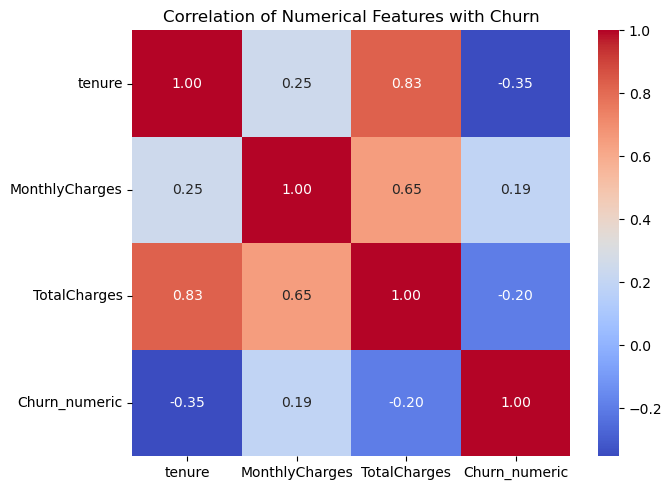

In [92]:
# Step 1: Convert Churn to binary
df['Churn_numeric'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Step 2: Clean TotalCharges (convert to numeric and drop NaNs)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df_clean = df.dropna(subset=['TotalCharges'])

# Step 3: Select numeric columns + churn
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn_numeric']
corr = df_clean[num_cols].corr()

# Step 4: Plot heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation of Numerical Features with Churn")
plt.tight_layout()
plt.show()

## Scatter plot (tenure vs. TotalCharges), colored by Churn

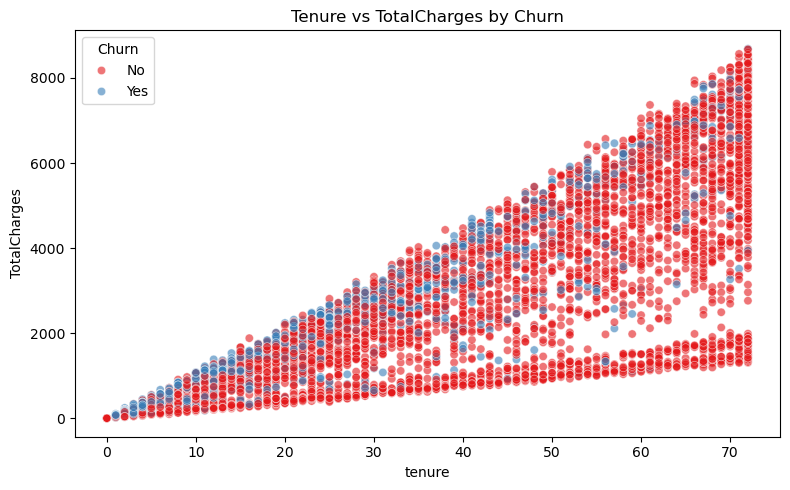

In [89]:
plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=df,
    x='tenure',
    y='TotalCharges',
    hue='Churn',
    alpha=0.6,
    palette='Set1'
)
plt.title("Tenure vs TotalCharges by Churn")
plt.tight_layout()
plt.show()


## Chi-Square Test (Categorical vs. Categorical)

In [95]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['PaymentMethod'], df['Churn'])

# Chi-square test
chi2, p, dof, ex = chi2_contingency(contingency_table)

print(f"Chi-square Statistic: {chi2:.2f}")
print(f"P-value: {p:.4f}")

if p < 0.05:
    print("✅ Significant association between PaymentMethod and Churn.")
else:
    print("❌ No significant association between PaymentMethod and Churn.")


Chi-square Statistic: 648.14
P-value: 0.0000
✅ Significant association between PaymentMethod and Churn.


### Note: There is a strong association between PaymentMethod and Churn — i.e., the type of payment customers use impacts their likelihood of churning.

## T-Test (Numerical vs. Binary)

In [96]:
from scipy.stats import ttest_ind

# Separate groups
churn_yes = df[df['Churn'] == 'Yes']['MonthlyCharges']
churn_no = df[df['Churn'] == 'No']['MonthlyCharges']

# Perform independent t-test
t_stat, p_val = ttest_ind(churn_yes, churn_no)

print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_val:.4f}")

if p_val < 0.05:
    print("✅ MonthlyCharges differ significantly between Churned and Non-Churned customers.")
else:
    print("❌ No significant difference in MonthlyCharges for Churn.")


T-statistic: 16.54
P-value: 0.0000
✅ MonthlyCharges differ significantly between Churned and Non-Churned customers.
